In [1]:
import pandas as pd 
from plotnine import * 

path = "modeling_results/tda.csv"
df = pd.read_csv(path, index_col=0)
df["window_length"] = df["window_length"].astype(int) 
df["overlap"] = df["overlap"].astype(int) 
df["number_windows"] = df["number_windows"].astype(int) 
df = df.melt(id_vars=['window_length', 'overlap', 'number_windows'], 
                         value_vars=['train_mse', 'test_mse', 'val_mse'], 
                         var_name='split', value_name='mse').reset_index(drop=True)
df['split'] = df['split'].str.replace('_mse', '').str.capitalize()
df['split'] = df['split'].str.replace('Val', 'Validation')
df['split'] = pd.Categorical(df['split'], categories=['Train', 'Test', 'Validation'], ordered=True)
df


,window_length,overlap,number_windows,split,mse
0,50,20,1,Train,50.976259
1,50,20,2,Train,39.635874
2,50,20,3,Train,35.444025
3,50,20,4,Train,32.924413
4,50,20,5,Train,31.210813
...,...,...,...,...,...
340,250,60,1,Validation,1117.741762
341,250,60,2,Validation,1070.733406
342,250,60,3,Validation,1021.100232
343,250,60,4,Validation,985.695518


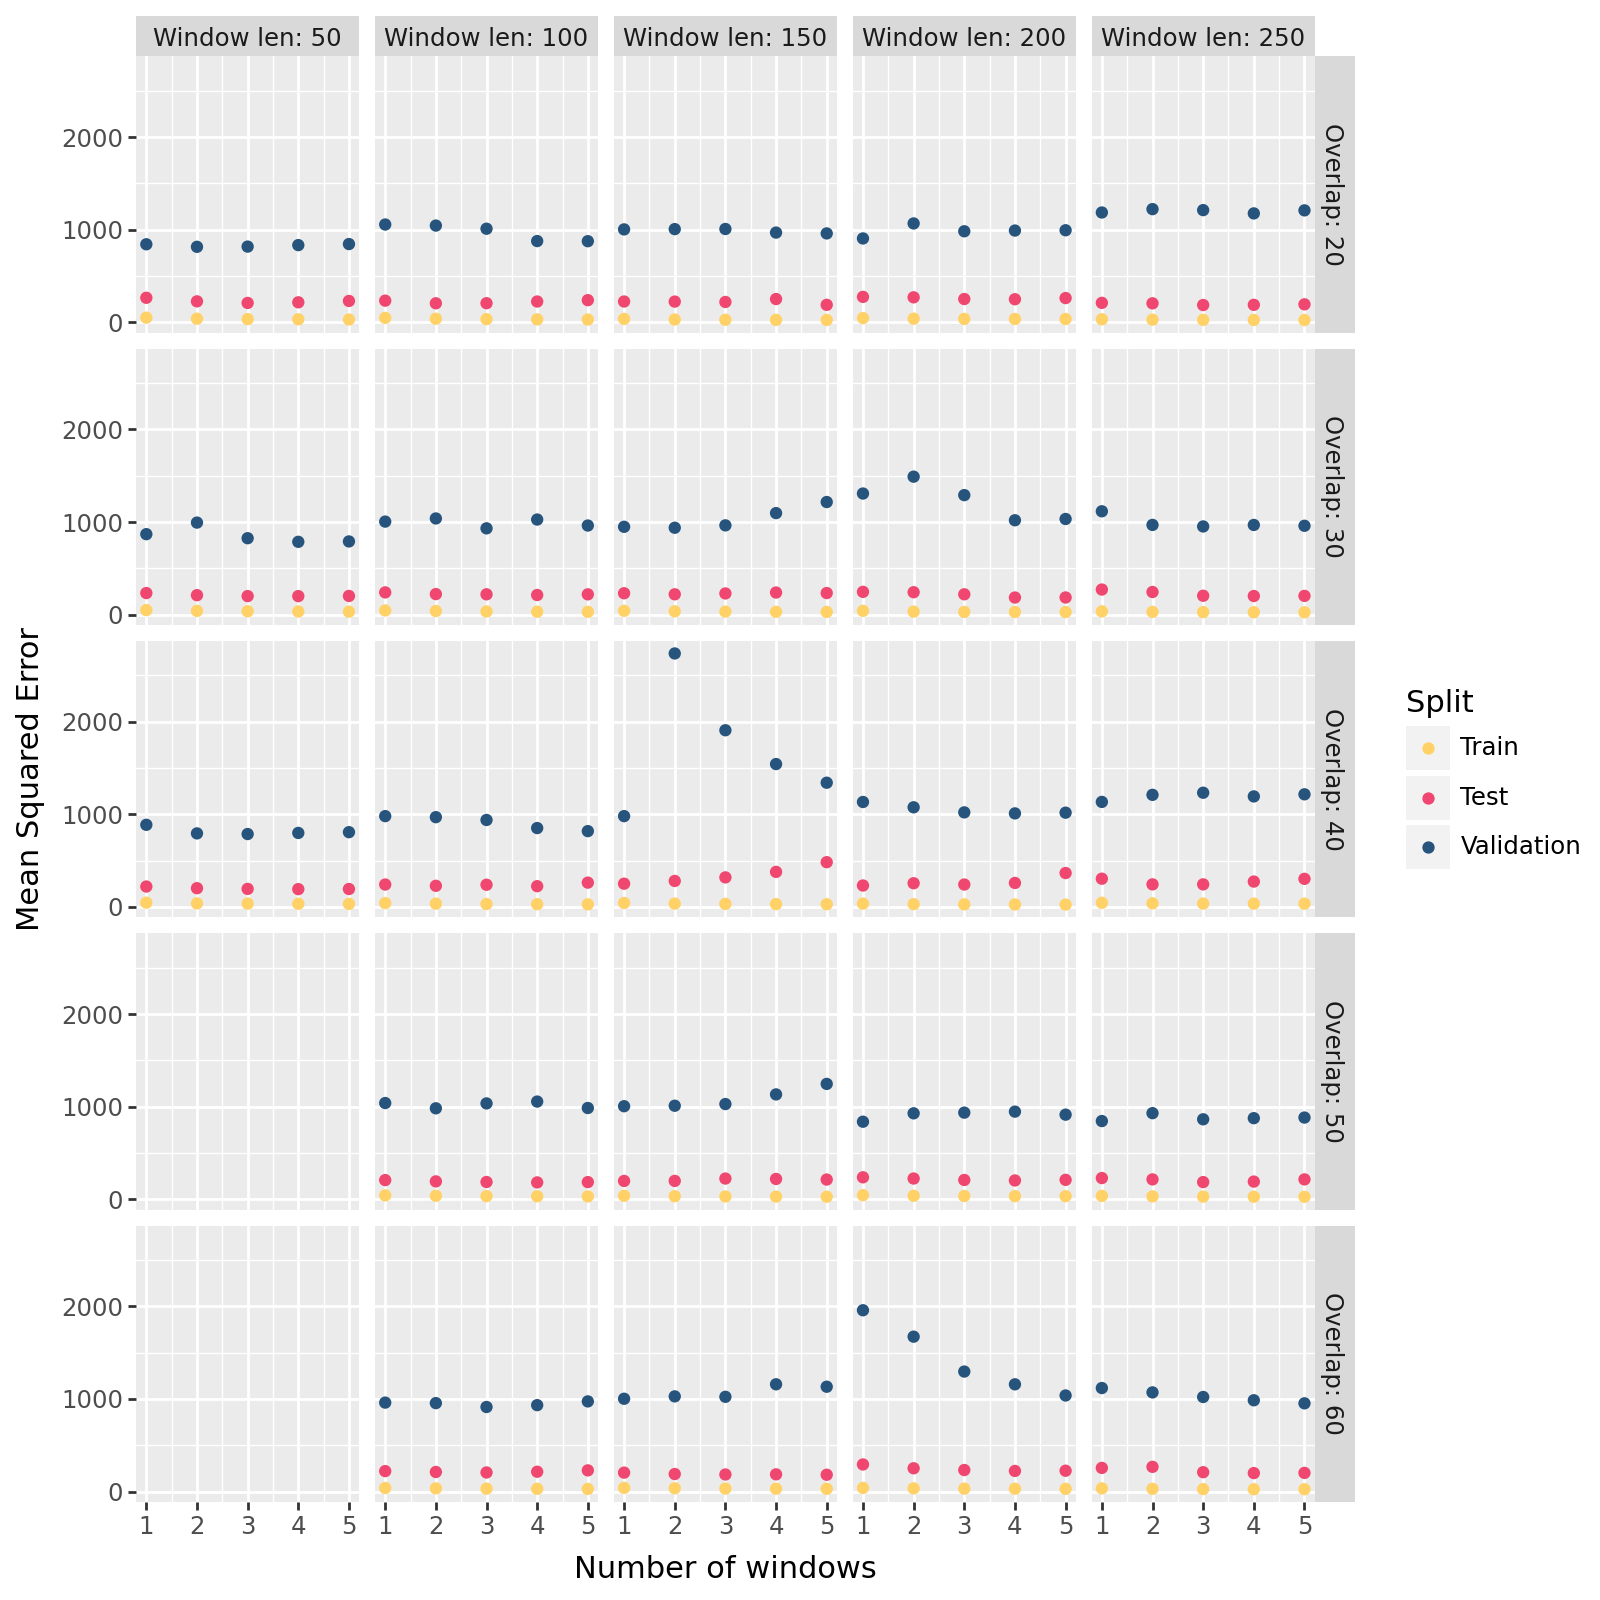

In [3]:
col_label = lambda s : "Window len: " + str(s)
row_label = lambda s : "Overlap: " + str(s)

colors = {"Train":'#ffd166', "Test":'#ef476f', "Validation":"#26547c"}  

(
    ggplot(df, aes(x = "number_windows", y = "mse", color = "split")) + 
    facet_grid("overlap~window_length", labeller = labeller(cols=col_label, rows=row_label)) + 
    geom_point() + 
    scale_x_continuous(breaks=list(range(1, max(df["number_windows"]) + 1))) +
    labs(x = "Number of windows", y = "Mean Squared Error", color = "Split") + 
    theme(figure_size=(8, 8)) +
    scale_color_manual(values = colors)
)

# By window, overlap, 

In [15]:
import pandas as pd 

path = "modeling_results/tda.csv"
df = pd.read_csv(path, index_col=0)
df["window_length"] = df["window_length"].astype(int) 
df["overlap"] = df["overlap"].astype(int) 
df["number_windows"] = df["number_windows"].astype(int) 
df = df.melt(id_vars=['window_length', 'overlap', 'number_windows'], 
                         value_vars=['train_mse', 'test_mse', 'val_mse'], 
                         var_name='split', value_name='mse').reset_index(drop=True)
df['split'] = df['split'].str.replace('_mse', '').str.capitalize()
df['split'] = df['split'].str.replace('Val', 'Validation')
df['split'] = pd.Categorical(df['split'], categories=['Train', 'Test', 'Validation'], ordered=True)
for i in range(3):
    pivot_on = ["window_length", "overlap", "number_windows"][i]
    clean_name = ["Window length", "Window overlap", "Number of windows"][i]
    pivot_df = df.groupby([pivot_on, "split"])[["mse"]].mean().reset_index().pivot(index = pivot_on, columns = "split", values = "mse").reset_index()
    pivot_df = pivot_df.rename(columns = { pivot_on : clean_name})
    print(pivot_df.to_latex(index=False, float_format="{:.1f}".format))


\begin{tabular}{rrrr}
\toprule
Window length & Train & Test & Validation \\
\midrule
50 & 38.2 & 213.5 & 833.2 \\
100 & 35.1 & 218.4 & 968.9 \\
150 & 32.8 & 239.1 & 1175.4 \\
200 & 34.2 & 242.2 & 1120.9 \\
250 & 30.8 & 226.1 & 1060.1 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrr}
\toprule
Window overlap & Train & Test & Validation \\
\midrule
20 & 34.5 & 226.8 & 996.8 \\
30 & 34.2 & 220.7 & 1020.0 \\
40 & 34.8 & 265.8 & 1135.7 \\
50 & 33.4 & 206.3 & 973.6 \\
60 & 32.0 & 219.3 & 1117.3 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrr}
\toprule
Number of windows & Train & Test & Validation \\
\midrule
1 & 41.6 & 240.5 & 1048.7 \\
2 & 35.4 & 227.7 & 1128.2 \\
3 & 32.2 & 218.6 & 1043.5 \\
4 & 30.6 & 222.6 & 1016.9 \\
5 & 29.6 & 236.2 & 1007.4 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_13212/2594467770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_13212/2594467770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipykernel_13212/2594467770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


\begin{tabular}{lrrrr}
\toprule
split & window_length & Train & Test & Validation \\
\midrule
0 & 50 & 78.346609 & 192.825022 & 828.697444 \\
1 & 100 & 55.605484 & 178.075196 & 782.729201 \\
2 & 150 & 55.637309 & 218.151581 & 925.241856 \\
3 & 200 & 45.102736 & 234.813293 & 708.776030 \\
4 & 250 & 45.001931 & 228.362516 & 735.821046 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_92878/3542370923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
